<a href="https://colab.research.google.com/github/iyngaranedu/api-response/blob/develop/LC_model_improvement_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Steps



1.   Download the lesion-diagnosis Dataset and unzip it clone the git repo which has a utility function to generate images for training and testing.
2.   Prepare datasets for train and test.
3.   Visualize the images
4.   Building a convolutional neural network
     1.   Preprocess / normalize the images 
     2.   Load all the images
     3.   Build a CNN to find patterns in the images
     4.   Compile our CNN
     5.   Fit the CNN to our training data
     6.   Visualise the training results
     7.   Recreate the model again and compile it and train


# 1. Download the lesion-diagnosis Dataset and unzip it clone the git repo which has a utility function to generate images for training and testing.

In [1]:
import zipfile
import os

#os.system("rm -rf ipythonUtils")
#os.system("rm -rf lesion-diagnosis")
#os.system("rm -rf lesion-diagnosis-ver2.zip")
#os.system("rm -rf test")
#os.system("rm -rf train")

isExist = os.path.exists("ipython-utils")
if not os.path.exists("ipython-utils"):
    !git clone https://github.com/iyngaran/ipythonUtils.git


if not os.path.exists("lesion-diagnosis-ver2.zip"):
    !wget  https://testing.idev55.com/lesion-diagnosis-ver2.zip

if not os.path.exists("lesion-diagnosis"):
    # Unzip the downloaded file
    zip_file = zipfile.ZipFile("lesion-diagnosis-ver2.zip", "r")
    zip_file.extractall()
    zip_file.close()

Cloning into 'ipythonUtils'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 21 (delta 6), reused 20 (delta 5), pack-reused 0
Unpacking objects: 100% (21/21), done.
--2022-10-16 08:07:28--  https://testing.idev55.com/lesion-diagnosis-ver2.zip
Resolving testing.idev55.com (testing.idev55.com)... 3.84.41.34
Connecting to testing.idev55.com (testing.idev55.com)|3.84.41.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1501915604 (1.4G) [application/zip]
Saving to: ‘lesion-diagnosis-ver2.zip’

lesion-diagnosis-ve 100%[===================>]   1.40G  12.6MB/s    in 1m 57s  

2022-10-16 08:09:26 (12.2 MB/s) - ‘lesion-diagnosis-ver2.zip’ saved [1501915604/1501915604]



In [2]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("lesion-diagnosis"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 10 directories and 1 images in 'lesion-diagnosis'.
There are 0 directories and 430 images in 'lesion-diagnosis/solar-lentigo'.
There are 0 directories and 261 images in 'lesion-diagnosis/vascular-lesion'.
There are 0 directories and 677 images in 'lesion-diagnosis/squamous-cell-carcinoma'.
There are 0 directories and 1002 images in 'lesion-diagnosis/nevus'.
There are 0 directories and 1002 images in 'lesion-diagnosis/melanoma'.
There are 0 directories and 912 images in 'lesion-diagnosis/actinic-keratosis'.
There are 0 directories and 1002 images in 'lesion-diagnosis/basal-cell-carcinoma'.
There are 0 directories and 255 images in 'lesion-diagnosis/dermatofibroma'.
There are 0 directories and 1002 images in 'lesion-diagnosis/seborrheic-keratosis'.
There are 0 directories and 1002 images in 'lesion-diagnosis/pigmented-benign-keratosis'.


**To Balance the data in all the classes, let's use `Augmentor` with `flip_top_bottom` and `zoom` to generate images**

In [3]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import Augmentor
p = Augmentor.Pipeline("lesion-diagnosis/solar-lentigo")
p.flip_top_bottom(probability=0.8)
p.zoom(probability=0.3, min_factor=1.1, max_factor=1.6)
p.sample(570) ## We are adding 570 samples.

p = Augmentor.Pipeline("lesion-diagnosis/vascular-lesion")
p.flip_top_bottom(probability=0.8)
p.zoom(probability=0.3, min_factor=1.1, max_factor=1.6)
p.sample(739) ## We are adding 739 samples.

p = Augmentor.Pipeline("lesion-diagnosis/dermatofibroma")
p.flip_top_bottom(probability=0.8)
p.zoom(probability=0.3, min_factor=1.1, max_factor=1.6)
p.sample(745) ## We are adding 745 samples.


p = Augmentor.Pipeline("lesion-diagnosis/squamous-cell-carcinoma")
p.flip_top_bottom(probability=0.8)
p.zoom(probability=0.3, min_factor=1.1, max_factor=1.6)
p.sample(323) ## We are adding 323 samples.

p = Augmentor.Pipeline("lesion-diagnosis/actinic-keratosis")
p.flip_top_bottom(probability=0.8)
p.zoom(probability=0.3, min_factor=1.1, max_factor=1.6)
p.sample(88) ## We are adding 88 samples per class.

Initialised with 428 image(s) found.
Output directory set to lesion-diagnosis/solar-lentigo/output.

Processing <PIL.Image.Image image mode=RGB size=1024x1024 at 0x7FC0EA6785D0>: 100%|██████████| 570/570 [01:58<00:00,  4.83 Samples/s]


Initialised with 259 image(s) found.
Output directory set to lesion-diagnosis/vascular-lesion/output.

Processing <PIL.Image.Image image mode=RGB size=1024x1024 at 0x7FC0F5DA4E90>: 100%|██████████| 739/739 [00:22<00:00, 32.57 Samples/s]


Initialised with 253 image(s) found.
Output directory set to lesion-diagnosis/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC0EA5D8BD0>: 100%|██████████| 745/745 [00:44<00:00, 16.80 Samples/s]


Initialised with 675 image(s) found.
Output directory set to lesion-diagnosis/squamous-cell-carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024 at 0x7FC0EA5EF910>: 100%|██████████| 323/323 [00:17<00:00, 18.37 Samples/s]


Initialised with 910 image(s) found.
Output directory set to lesion-diagnosis/actinic-keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x1024 at 0x7FC0F08F7090>: 100%|██████████| 88/88 [00:03<00:00, 22.15 Samples/s]


In [5]:
!mv lesion-diagnosis/solar-lentigo/output/* lesion-diagnosis/solar-lentigo/
!mv lesion-diagnosis/vascular-lesion/output/* lesion-diagnosis/vascular-lesion/
!mv lesion-diagnosis/dermatofibroma/output/* lesion-diagnosis/dermatofibroma/
!mv lesion-diagnosis/squamous-cell-carcinoma/output/* lesion-diagnosis/squamous-cell-carcinoma/
!mv lesion-diagnosis/actinic-keratosis/output/* lesion-diagnosis/actinic-keratosis/


!rm -rf lesion-diagnosis/solar-lentigo/output
!rm -rf lesion-diagnosis/vascular-lesion/output
!rm -rf lesion-diagnosis/dermatofibroma/output
!rm -rf lesion-diagnosis/squamous-cell-carcinoma/output
!rm -rf lesion-diagnosis/actinic-keratosis/output

In [6]:
for dirpath, dirnames, filenames in os.walk("lesion-diagnosis"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 10 directories and 1 images in 'lesion-diagnosis'.
There are 0 directories and 1000 images in 'lesion-diagnosis/solar-lentigo'.
There are 0 directories and 1000 images in 'lesion-diagnosis/vascular-lesion'.
There are 0 directories and 1000 images in 'lesion-diagnosis/squamous-cell-carcinoma'.
There are 0 directories and 1002 images in 'lesion-diagnosis/nevus'.
There are 0 directories and 1002 images in 'lesion-diagnosis/melanoma'.
There are 0 directories and 1000 images in 'lesion-diagnosis/actinic-keratosis'.
There are 0 directories and 1002 images in 'lesion-diagnosis/basal-cell-carcinoma'.
There are 0 directories and 1000 images in 'lesion-diagnosis/dermatofibroma'.
There are 0 directories and 1002 images in 'lesion-diagnosis/seborrheic-keratosis'.
There are 0 directories and 1002 images in 'lesion-diagnosis/pigmented-benign-keratosis'.


 we can see here, all the classes have the same number of images

# 2. Prepare datasets for train and test 

Generate test and train datasets using the `generate_test_and_train_datasets` utility function

In [7]:
from ipythonUtils.generateTestTrain import generate_test_and_train_datasets
if not os.path.exists("train/actinic-keratosis"):
   generate_test_and_train_datasets()

Turn our training path into a Python path and created a list of class_names from the subdirectories

In [8]:
import pathlib
import numpy as np

data_dir = pathlib.Path("train") 
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['actinic-keratosis' 'basal-cell-carcinoma' 'dermatofibroma' 'melanoma'
 'nevus' 'pigmented-benign-keratosis' 'seborrheic-keratosis'
 'solar-lentigo' 'squamous-cell-carcinoma' 'vascular-lesion']


In [9]:
!ls train

actinic-keratosis     nevus			  squamous-cell-carcinoma
basal-cell-carcinoma  pigmented-benign-keratosis  vascular-lesion
dermatofibroma	      seborrheic-keratosis
melanoma	      solar-lentigo


**Setup the train and test directories**

In [10]:
data_dir_train = pathlib.Path("train")
data_dir_test = pathlib.Path("test")

In [11]:
image_count_train = len(list(data_dir_train.glob('*/*.JPG')))
image_count_test = len(list(data_dir_test.glob('*/*.JPG')))
image_count_train, image_count_test

(7989, 2001)

#3. Visualize the images

Image shape: (1024, 1024, 3)


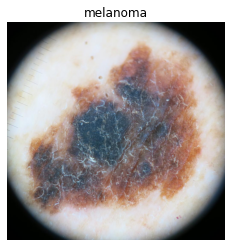

In [12]:
from ipythonUtils.generateTestTrain import view_random_image
img = view_random_image(target_dir="train", target_class="melanoma")

Image shape: (2448, 3264, 3)


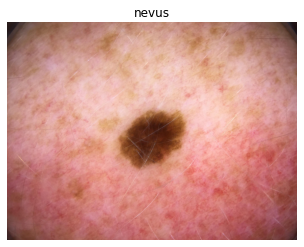

In [13]:
img2 = view_random_image(target_dir="test", target_class="nevus")

In [14]:
img.shape, img2.shape

((1024, 1024, 3), (2448, 3264, 3))

#4.   Building a convolutional neural network

#### 4.1 Preprocess / normalize the images

In [15]:
batch_size = 32
img_height = 180
img_width = 180
num_classes = len(class_names)

In [16]:
import tensorflow as tf

## create train dataset

## get all the train images and resizing them to the size of img_height*img_width and create batches
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='training',
    image_size=(img_height, img_width),  
    batch_size=batch_size)

Found 7989 files belonging to 10 classes.
Using 6392 files for training.


In [17]:
## create validation dataset
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='validation',
    image_size=(img_height, img_width),  
    batch_size=batch_size)

Found 7989 files belonging to 10 classes.
Using 1597 files for validation.


**See the classes distribution**

**Load all the images - Randomly select an image from each classes and display them.**

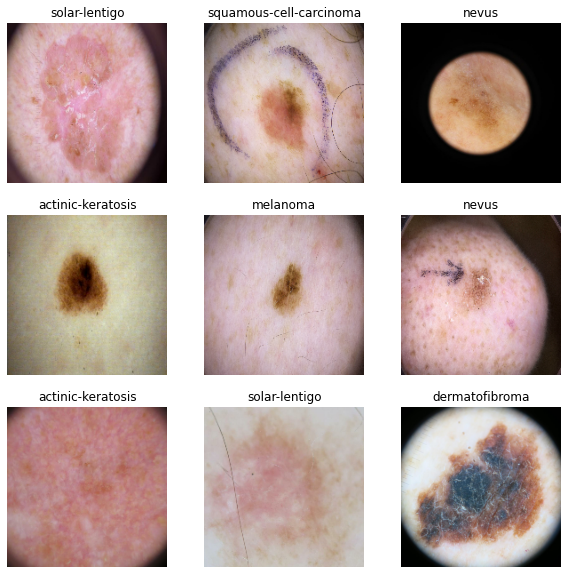

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(len(class_names)-1):
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(class_names[labels[i]])
    plt.axis("off")

**Cache DataSet**

Keeps the images in memory using `Dataset.cache()` -  after images are loaded off disk during the first epoch.

Overlaps data preprocessing and model execution while training - `Dataset.prefetch().`

In [19]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

#### 4.3 Build a CNN to find patterns in the images

In [20]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

#### 4.4 Compile our CNN

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

#### 4.5 Fit the CNN to our training data

In [23]:
epochs = 20
history = model.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs
)

Epoch 1/20
200/200 [==============================] - 80s 94ms/step - loss: 2.0244 - accuracy: 0.2650 - val_loss: 1.7868 - val_accuracy: 0.3826
Epoch 2/20
200/200 [==============================] - 5s 24ms/step - loss: 1.7411 - accuracy: 0.3742 - val_loss: 1.6733 - val_accuracy: 0.4145
Epoch 3/20
200/200 [==============================] - 5s 24ms/step - loss: 1.6040 - accuracy: 0.4262 - val_loss: 1.6064 - val_accuracy: 0.4258
Epoch 4/20
200/200 [==============================] - 5s 23ms/step - loss: 1.4703 - accuracy: 0.4740 - val_loss: 1.5569 - val_accuracy: 0.4314
Epoch 5/20
200/200 [==============================] - 5s 24ms/step - loss: 1.3626 - accuracy: 0.5097 - val_loss: 1.4341 - val_accuracy: 0.4865
Epoch 6/20
200/200 [==============================] - 5s 24ms/step - loss: 1.1903 - accuracy: 0.5666 - val_loss: 1.4957 - val_accuracy: 0.4903
Epoch 7/20
200/200 [==============================] - 5s 24ms/step - loss: 1.0259 - accuracy: 0.6364 - val_loss: 1.5981 - val_accuracy: 0.494

#### 4.6 Visualizing training results

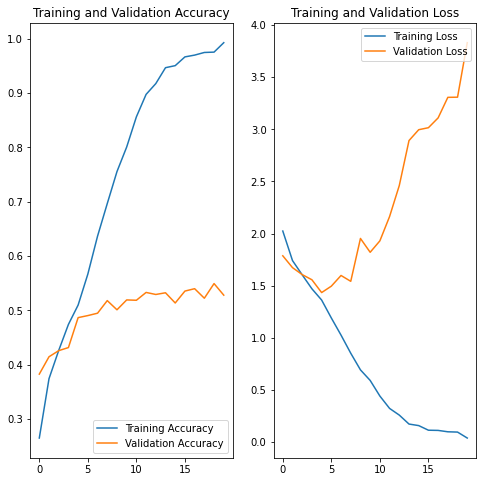

In [24]:
acc = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

As we can see here that the training accuracy has improved a lot however, the validation accuracy hasn’t improve much. It means the model is overfitting and it is not able to generalise well.

Similarly, the training loss is falling down and validation loss is increasing dramatically.

To overcome this problem, I am going to use augmentation technique. I am going to generate new samples by modifying the existing training data and use them t0 train the model.


In [25]:
data_augmentation = keras.Sequential([
      layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
      layers.experimental.preprocessing.RandomRotation(0.1),
      layers.experimental.preprocessing.RandomZoom(0.1),
])

In [26]:
from glob import glob
path_list = [ x for x in glob(os.path.join(data_dir_train, '*', '*.JPG')) ] 
lesion_list = [ os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.JPG')) ]
print(len(lesion_list))

7989


In [27]:
df_dict_original = dict(zip(path_list, lesion_list))
list(df_dict_original.items())[:2]

[('train/solar-lentigo/ISIC_0135990.JPG', 'solar-lentigo'),
 ('train/solar-lentigo/solar-lentigo_original_ISIC_0064445.JPG_b8f4c420-e578-470c-a023-6cb63e8acb7d.JPG',
  'solar-lentigo')]

In [28]:
import pandas as pd
original_df = pd.DataFrame(list(df_dict_original.items()), columns=['Path','Label'])
original_df.head()

,Path,Label
0,train/solar-lentigo/ISIC_0135990.JPG,solar-lentigo
1,train/solar-lentigo/solar-lentigo_original_ISI...,solar-lentigo
2,train/solar-lentigo/ISIC_7904757.JPG,solar-lentigo
3,train/solar-lentigo/solar-lentigo_original_ISI...,solar-lentigo
4,train/solar-lentigo/ISIC_0011640.JPG,solar-lentigo


In [29]:
original_df[['Label']].value_counts()

Label                     
basal-cell-carcinoma          799
dermatofibroma                799
melanoma                      799
nevus                         799
pigmented-benign-keratosis    799
seborrheic-keratosis          799
solar-lentigo                 799
squamous-cell-carcinoma       799
vascular-lesion               799
actinic-keratosis             798
dtype: int64

In [30]:
original_df[['Label']].value_counts(normalize=True)

Label                     
basal-cell-carcinoma          0.100013
dermatofibroma                0.100013
melanoma                      0.100013
nevus                         0.100013
pigmented-benign-keratosis    0.100013
seborrheic-keratosis          0.100013
solar-lentigo                 0.100013
squamous-cell-carcinoma       0.100013
vascular-lesion               0.100013
actinic-keratosis             0.099887
dtype: float64

In [31]:
path_to_training_dataset=str(data_dir_train) + '/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(1000) ## We are adding 1000 samples per class.

Initialised with 798 image(s) found.
Output directory set to train/actinic-keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x1024 at 0x7FC0EA5E35D0>: 100%|██████████| 1000/1000 [01:56<00:00,  8.61 Samples/s]


Initialised with 799 image(s) found.
Output directory set to train/basal-cell-carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x1024 at 0x7FC01C2A7810>: 100%|██████████| 1000/1000 [01:47<00:00,  9.28 Samples/s]


Initialised with 799 image(s) found.
Output directory set to train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC01C2CA250>: 100%|██████████| 1000/1000 [02:23<00:00,  6.96 Samples/s]


Initialised with 799 image(s) found.
Output directory set to train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=3264x2448 at 0x7FC070156050>: 100%|██████████| 1000/1000 [08:20<00:00,  2.00 Samples/s]


Initialised with 799 image(s) found.
Output directory set to train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=3264x2448 at 0x7FC01C5F8850>: 100%|██████████| 1000/1000 [14:31<00:00,  1.15 Samples/s]


Initialised with 799 image(s) found.
Output directory set to train/pigmented-benign-keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FC0701BFE10>: 100%|██████████| 1000/1000 [00:29<00:00, 33.53 Samples/s]


Initialised with 799 image(s) found.
Output directory set to train/seborrheic-keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024 at 0x7FC01C4609D0>: 100%|██████████| 1000/1000 [03:54<00:00,  4.27 Samples/s]


Initialised with 799 image(s) found.
Output directory set to train/solar-lentigo/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3264x2448 at 0x7FC081475D10>: 100%|██████████| 1000/1000 [06:35<00:00,  2.53 Samples/s]


Initialised with 799 image(s) found.
Output directory set to train/squamous-cell-carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=3264x2448 at 0x7FC01C5168D0>: 100%|██████████| 1000/1000 [02:21<00:00,  7.07 Samples/s]


Initialised with 799 image(s) found.
Output directory set to train/vascular-lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024 at 0x7FC08122EDD0>: 100%|██████████| 1000/1000 [01:15<00:00, 13.27 Samples/s]


In [32]:
total_train_images = len(list(data_dir_train.glob('*/output/*.JPG')))
print(total_train_images)

10000


**Let's see the distribution of augmented data.**

In [33]:
from glob import glob
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.JPG'))]
path_list_new[:2]

['train/solar-lentigo/output/solar-lentigo_original_solar-lentigo_original_ISIC_2116449.JPG_21eabbae-0396-43c9-8d9e-921629a95b97.JPG_be28c5cb-0624-440d-9afa-bcb178668931.JPG',
 'train/solar-lentigo/output/solar-lentigo_original_ISIC_0010743.JPG_1d857688-a047-4aa7-a452-4f2938926ecf.JPG']

In [34]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.JPG'))]
lesion_list_new[:2]

['solar-lentigo', 'solar-lentigo']

In [35]:
import pandas as pd
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

df_2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df_2)
new_df.shape

(17989, 2)

In [36]:
new_df.head()

,Path,Label
0,train/solar-lentigo/ISIC_0135990.JPG,solar-lentigo
1,train/solar-lentigo/solar-lentigo_original_ISI...,solar-lentigo
2,train/solar-lentigo/ISIC_7904757.JPG,solar-lentigo
3,train/solar-lentigo/solar-lentigo_original_ISI...,solar-lentigo
4,train/solar-lentigo/ISIC_0011640.JPG,solar-lentigo


In [37]:
# Checking the class distribution after adding the new images
new_df['Label'].value_counts(normalize=True)

solar-lentigo                 0.100006
vascular-lesion               0.100006
squamous-cell-carcinoma       0.100006
nevus                         0.100006
melanoma                      0.100006
basal-cell-carcinoma          0.100006
dermatofibroma                0.100006
seborrheic-keratosis          0.100006
pigmented-benign-keratosis    0.100006
actinic-keratosis             0.099950
Name: Label, dtype: float64

In [38]:
new_df['Label'].value_counts()

solar-lentigo                 1799
vascular-lesion               1799
squamous-cell-carcinoma       1799
nevus                         1799
melanoma                      1799
basal-cell-carcinoma          1799
dermatofibroma                1799
seborrheic-keratosis          1799
pigmented-benign-keratosis    1799
actinic-keratosis             1798
Name: Label, dtype: int64

**Again : Train the model with complete dataset (including newly created images using Augmentor)**

**Create a training dataset**

In [39]:
# data_dir_train="path to directory with training data + data created using augmentor"
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 17989 files belonging to 10 classes.
Using 14392 files for training.


**Create a validation dataset**

In [40]:
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 17989 files belonging to 10 classes.
Using 3597 files for validation.


**Recreate the model again**

In [41]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [42]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [43]:
epochs = 50

history = model.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs
)

Epoch 1/50
450/450 [==============================] - 168s 366ms/step - loss: 1.9183 - accuracy: 0.3077 - val_loss: 1.6715 - val_accuracy: 0.3959
Epoch 2/50
450/450 [==============================] - 158s 346ms/step - loss: 1.6616 - accuracy: 0.4006 - val_loss: 1.5903 - val_accuracy: 0.4254
Epoch 3/50
450/450 [==============================] - 156s 343ms/step - loss: 1.5573 - accuracy: 0.4382 - val_loss: 1.4898 - val_accuracy: 0.4582
Epoch 4/50
450/450 [==============================] - 156s 342ms/step - loss: 1.4577 - accuracy: 0.4719 - val_loss: 1.4390 - val_accuracy: 0.4732
Epoch 5/50
450/450 [==============================] - 155s 339ms/step - loss: 1.3892 - accuracy: 0.5010 - val_loss: 1.3301 - val_accuracy: 0.5218
Epoch 6/50
450/450 [==============================] - 156s 341ms/step - loss: 1.3056 - accuracy: 0.5304 - val_loss: 1.2639 - val_accuracy: 0.5521
Epoch 7/50
450/450 [==============================] - 156s 343ms/step - loss: 1.2372 - accuracy: 0.5602 - val_loss: 1.1748 -

**Visualize the model results**

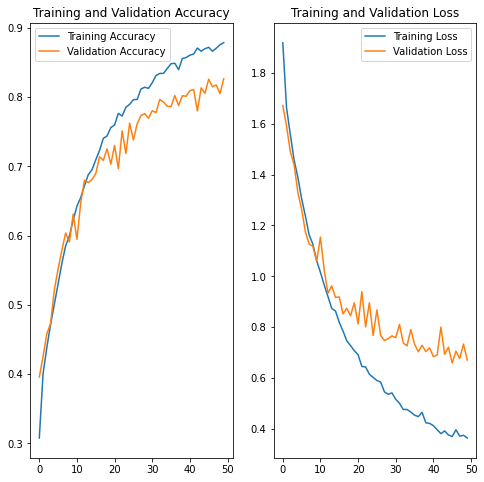

In [44]:
acc = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Making a prediction with our trained model

--2022-10-16 11:12:39--  https://goldencoastdermatology.com/wp-content/uploads/2020/02/ACTINIC-KERATOSES.jpg
Resolving goldencoastdermatology.com (goldencoastdermatology.com)... 194.1.147.56, 194.1.147.40
Connecting to goldencoastdermatology.com (goldencoastdermatology.com)|194.1.147.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43058 (42K) [image/jpeg]
Saving to: ‘ACTINIC-KERATOSES.jpg’

ACTINIC-KERATOSES.j 100%[===================>]  42.05K  --.-KB/s    in 0.09s   

2022-10-16 11:12:40 (445 KB/s) - ‘ACTINIC-KERATOSES.jpg’ saved [43058/43058]



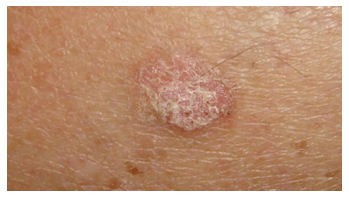

In [45]:
import matplotlib.image as mpimg

!wget https://goldencoastdermatology.com/wp-content/uploads/2020/02/ACTINIC-KERATOSES.jpg
actinic_keratosis = mpimg.imread("ACTINIC-KERATOSES.jpg")
plt.imshow(actinic_keratosis)
plt.axis(False);

In [46]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=180):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [47]:
# Load in and preprocess our custom image
actinic_keratosis = load_and_prep_image("ACTINIC-KERATOSES.jpg")
actinic_keratosis

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[0.732384  , 0.542384  , 0.39424673],
        [0.6818628 , 0.4777549 , 0.33442155],
        [0.658701  , 0.43367648, 0.28612745],
        ...,
        [0.79636467, 0.6453352 , 0.52722245],
        [0.7537747 , 0.587098  , 0.46544114],
        [0.7535209 , 0.57633305, 0.43436715]],

       [[0.7102745 , 0.50890195, 0.3585098 ],
        [0.73567647, 0.5282255 , 0.37959805],
        [0.67696077, 0.46095586, 0.3081209 ],
        ...,
        [0.89151275, 0.76515645, 0.66710913],
        [0.791265  , 0.6472453 , 0.54195106],
        [0.76442003, 0.61216027, 0.48933172]],

       [[0.6685131 , 0.4626634 , 0.30995098],
        [0.7285784 , 0.5168137 , 0.36779413],
        [0.71593136, 0.5045343 , 0.35490197],
        ...,
        [0.9801487 , 0.86842483, 0.7829264 ],
        [0.8377212 , 0.70747596, 0.6119856 ],
        [0.79355407, 0.6562992 , 0.54407686]],

       ...,

       [[0.57634807, 0.37901145, 0.2339134 ],
        [0.57

In [48]:
# Add an extra axis
print(f"Shape before new dimension: {actinic_keratosis.shape}")
actinic_keratosis = tf.expand_dims(actinic_keratosis, axis=0) # add an extra dimension at axis 0
print(f"Shape after new dimension: {actinic_keratosis.shape}")
actinic_keratosis

Shape before new dimension: (180, 180, 3)
Shape after new dimension: (1, 180, 180, 3)


<tf.Tensor: shape=(1, 180, 180, 3), dtype=float32, numpy=
array([[[[0.732384  , 0.542384  , 0.39424673],
         [0.6818628 , 0.4777549 , 0.33442155],
         [0.658701  , 0.43367648, 0.28612745],
         ...,
         [0.79636467, 0.6453352 , 0.52722245],
         [0.7537747 , 0.587098  , 0.46544114],
         [0.7535209 , 0.57633305, 0.43436715]],

        [[0.7102745 , 0.50890195, 0.3585098 ],
         [0.73567647, 0.5282255 , 0.37959805],
         [0.67696077, 0.46095586, 0.3081209 ],
         ...,
         [0.89151275, 0.76515645, 0.66710913],
         [0.791265  , 0.6472453 , 0.54195106],
         [0.76442003, 0.61216027, 0.48933172]],

        [[0.6685131 , 0.4626634 , 0.30995098],
         [0.7285784 , 0.5168137 , 0.36779413],
         [0.71593136, 0.5045343 , 0.35490197],
         ...,
         [0.9801487 , 0.86842483, 0.7829264 ],
         [0.8377212 , 0.70747596, 0.6119856 ],
         [0.79355407, 0.6562992 , 0.54407686]],

        ...,

        [[0.57634807, 0.37901145, 

In [49]:
pred = model.predict(actinic_keratosis)
pred

1/1 [==============================] - 0s 200ms/step


array([[ 0.848749  ,  0.98322535, -1.5519851 ,  0.37906706, -7.434074  ,
        -6.3057375 ,  1.4786911 , -1.5531343 , -0.1243973 ,  0.02592035]],
      dtype=float32)

In [50]:
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'basal-cell-carcinoma'

In [51]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 15ms/step


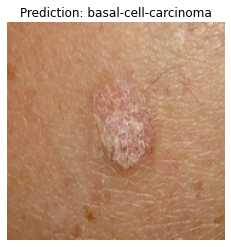

In [52]:
# Test our model on a custom image
pred_and_plot(model, "ACTINIC-KERATOSES.jpg", class_names)

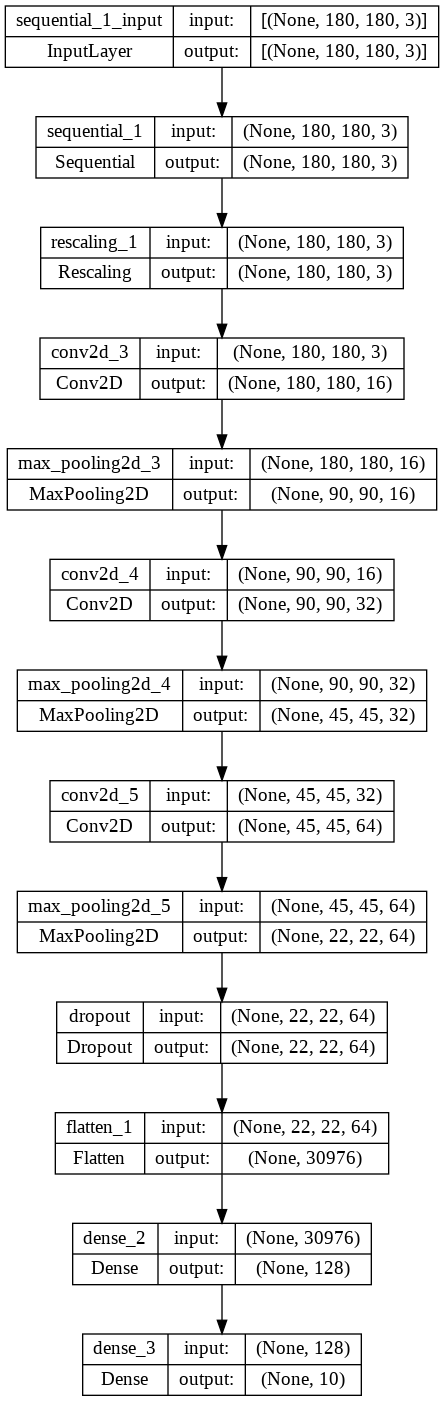

In [53]:
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

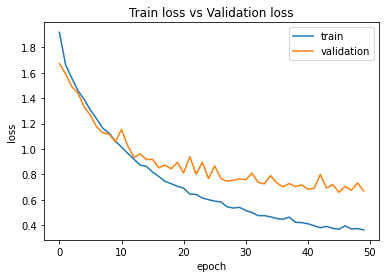

In [62]:
def plot_history(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Train loss vs Validation loss')
  plt.ylabel('loss') 
  plt.xlabel('epoch') 
  plt.legend([ 'train' , 'validation' ], loc='upper right') 
  plt.show()


plot_history(history)

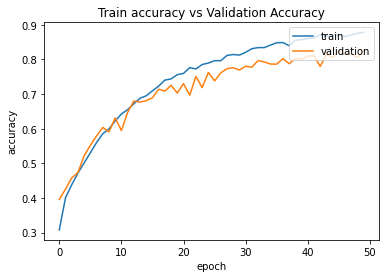

In [63]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Train accuracy vs Validation Accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch') 
plt.legend([ 'train' , 'validation' ], loc= 'upper right') 
plt.show()